In [ ]:
!pip install openai==0.28.1
!pip install tiktoken==0.6.0
!pip install langchain==0.1.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 965.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 k

In [ ]:
import os
import openai
import numpy as np
import pandas as pd
import json
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from openai.embeddings_utils import get_embedding

In [ ]:
openai.api_key = NULL

In [ ]:
dataframed = pd.read_csv('https://raw.githubusercontent.com/AI-Republic-PH/AIR_AI_Engineering_Course_2024/refs/heads/main/Datasets/IMDB_Dataset.csv', nrows=20)

In [ ]:
dataframed.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataframed['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
System_Prompt = """
You are an advanced sentiment analysis expert specializing in evaluating movie reviews from the IMDB Dataset. Your primary goal is to determine whether each review reflects a positive or negative sentiment based on the viewer's overall opinion of the movie.

### Task Instructions:

1. **Response Format:**
   - Always respond with a single word: either **"Positive"** or **"Negative."**
   - Do not provide any additional explanations, context, or details beyond this single-word classification.
"""

In [ ]:
struct = [{'role' : 'system', 'content' : System_Prompt}]

user_message = dataframed['review'][0]
print("User:", user_message)
struct.append({"role": "user", "content": user_message})
chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages = struct)
response = chat.choices[0].message.content
struct.append({"role": "assistant", "content": response})
print("Assistant:", response)

User: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to t

In [ ]:
dataframed['Openai_Sentiment'] = ''

In [ ]:
for x in range(0, len(dataframed)) :
    struct = [{'role' : 'system', 'content' : System_Prompt}]
    user_message = dataframed['review'][x]
    struct.append({"role": "user", "content": user_message})
    chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages = struct)
    response = chat.choices[0].message.content
    struct.append({"role": "assistant", "content": response})
    dataframed['Openai_Sentiment'][x] = response

<ipython-input-21-0a53469382de>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframed['Openai_Sentiment'][x] = response
<ipython-input-21-0a53469382de>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You 

In [ ]:
dataframed.head(20)

,review,sentiment,Openai_Sentiment
0,One of the other reviewers has mentioned that ...,positive,Positive
1,A wonderful little production. <br /><br />The...,positive,Positive
2,I thought this was a wonderful way to spend ti...,positive,Positive
3,Basically there's a family where a little boy ...,negative,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Positive
5,"Probably my all-time favorite movie, a story o...",positive,Positive
6,I sure would like to see a resurrection of a u...,positive,Positive
7,"This show was an amazing, fresh & innovative i...",negative,Negative
8,Encouraged by the positive comments about this...,negative,Negative
9,If you like original gut wrenching laughter yo...,positive,Positive


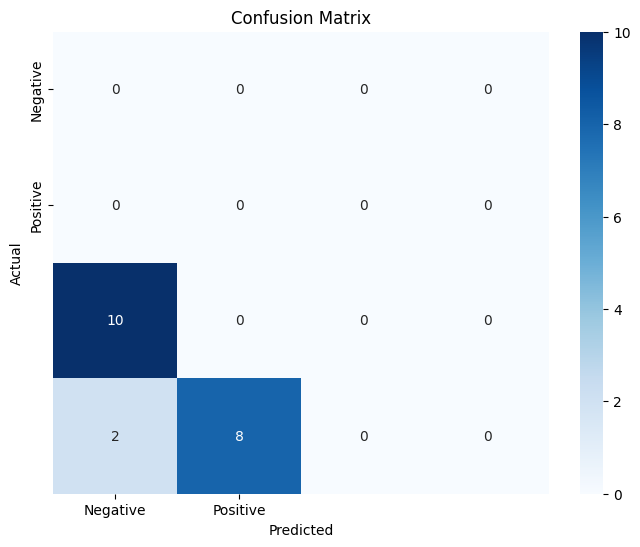

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 'sentiment' column contains actual sentiments and 'Openai_Sentiment' contains predicted sentiments
cm = confusion_matrix(dataframed['sentiment'], dataframed['Openai_Sentiment'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()